In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('C:\Data Analyst Projects\Practice Datasets\Dummy_Sales.csv')

In [2]:
data

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [4]:
data['Influencer'].unique()

array(['Mega', 'Micro', 'Nano', 'Macro'], dtype=object)

In [5]:
data.describe()

,TV,Radio,Social Media,Sales
count,4562.000000,4568.000000,4566.000000,4566.000000
mean,54.066857,18.160356,3.323956,192.466602
std,26.125054,9.676958,2.212670,93.133092
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.525957,1.527849,112.322882
50%,53.000000,17.859513,3.055565,189.231172
75%,77.000000,25.649730,4.807558,272.507922
max,100.000000,48.871161,13.981662,364.079751


From what I see, Influencer needs the get dummies function to One hot encode it, and there are Null values in all columns other than the influencer column, so I will have to fill those in.

In [6]:
data = data.join(pd.get_dummies(data.Influencer)).drop(['Influencer'], axis=1)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Sales         4566 non-null   float64
 4   Macro         4572 non-null   bool   
 5   Mega          4572 non-null   bool   
 6   Micro         4572 non-null   bool   
 7   Nano          4572 non-null   bool   
dtypes: bool(4), float64(4)
memory usage: 160.9 KB


Because these remaining columns are only missing 6, 4, and 10 values, I will just use the mean to fill them in

In [8]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")

data['TV'] = imputer.fit_transform(data[['TV']])
data['Radio'] = imputer.fit_transform(data[['Radio']])
data['Social Media'] = imputer.fit_transform(data[['Social Media']])
data['Sales'] = imputer.fit_transform(data[['Sales']])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4572 non-null   float64
 1   Radio         4572 non-null   float64
 2   Social Media  4572 non-null   float64
 3   Sales         4572 non-null   float64
 4   Macro         4572 non-null   bool   
 5   Mega          4572 non-null   bool   
 6   Micro         4572 non-null   bool   
 7   Nano          4572 non-null   bool   
dtypes: bool(4), float64(4)
memory usage: 160.9 KB


<Axes: >

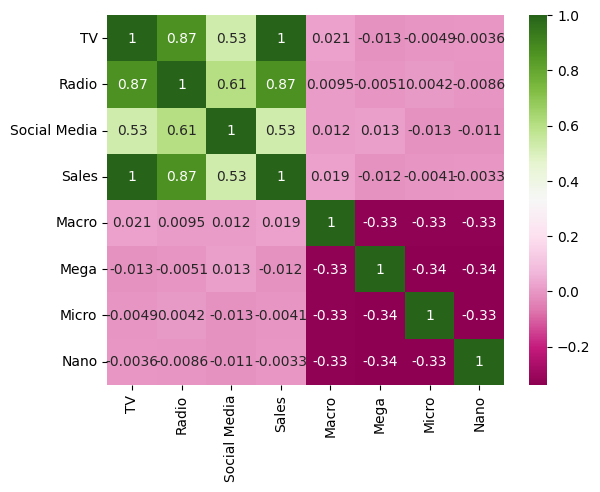

In [34]:
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="PiYG")

In [10]:
from sklearn.model_selection import train_test_split

X = data.drop(['Sales'], axis=1)
y = data['Sales']


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)

mlr_s = LinearRegression()

mlr_s.fit(X_train_s, y_train)

LinearRegression()

In [28]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()

mlr.fit(X_train, y_train)

LinearRegression()

In [29]:
X_test_s

array([[ 0.76216487,  0.67273928, -0.5372549 , ..., -0.58618456,
        -0.57777093,  1.66295884],
       [-1.36563356, -1.20960173, -0.58637167, ...,  1.70594736,
        -0.57777093, -0.60133779],
       [ 0.91415047,  0.21419098, -0.34605959, ..., -0.58618456,
        -0.57777093, -0.60133779],
       ...,
       [ 1.40810368,  1.67640372,  2.14969529, ..., -0.58618456,
         1.73078976, -0.60133779],
       [-0.90967675, -1.30313521, -1.02964935, ..., -0.58618456,
        -0.57777093,  1.66295884],
       [ 0.26821166,  0.95689811,  0.11266129, ..., -0.58618456,
        -0.57777093,  1.66295884]])

In [31]:
mlr_s.score(X_test_s, y_test)

0.9932849657941654

In [32]:
mlr.score(X_test, y_test)

0.994757606074263

In [39]:
X1 = data[['TV']]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.2)

In [40]:
X1_train

,TV
2360,44.0
1809,35.0
175,69.0
2899,90.0
4160,77.0
...,...
3577,16.0
975,68.0
1075,84.0
1663,96.0


In [41]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X1_train, y1_train)

LinearRegression()

In [42]:
reg.score(X1_test, y1_test)

0.9937104488580929

So from the heatmap of correlation, and the model results, it seems that the TV budget is really close to a 1:1 correlation, and is the leading variable for the linear regression